In [67]:
#########################################################################################################################
# Set up the most basic analytics pipeline for the forecast project.                                 04-10.2018         #         
#–Use close price as input                                                                                              #
#–Create a label 1-day ahead                                                                                            # 
#–Train your linear model                                                                                               #
#–Create a prediction                                                                                                   #
#–Visualize prediction and price in same chart                                                                          #
#                                                                                                                       #
#                                                      Assignment -2    
#
#                                                                          Jyothi Nandikonda                                                    
#                                                                                                   Course 1
#########################################################################################################################


In [88]:
import datetime as dt
import pandas as pd
import numpy as np

In [89]:
#
# Importing the Data reader Library
#

In [90]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader.data import DataReader

In [91]:
#
# Retreiving the today's date from datetime
#

In [92]:
end = dt.datetime.now()
print(end) # to test what date it will print

2018-10-02 22:22:36.957617


In [93]:
#
# Taking 5 Years of Data , Eg: Staring from Today
#

In [94]:
# Define the time frame of Stock , 5 yrs back from today
start = end - dt.timedelta(days=5*365) 
print(start)

2013-10-03 22:22:36.957617


In [95]:
# Use DataReader to get APPLES Stock data from IEX
# You get data from IEX in OHLC (OPEN,HIGH,LOW,CLOSE) + Vol format
# Analyze data for a single stock 'AAPL'
#

In [96]:
df = DataReader('AAPL','iex',start,end)

5y


In [ ]:
df.describe(include=['object'])

In [97]:
df.head()
#######################################################################
# Prints the  First 5 rows of Open, High, Low, Close : Basically price 
#Each day has a record for:
#– Open price
#– Day high and low
#– Close price
#– Each day also have a volume

,open,high,low,close,volume
date,,,,,
2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488


In [98]:
import matplotlib
import matplotlib.pyplot as plt

In [45]:
df['Log_Ret'] = np.log(df["close"] / df["close"].shift(1))

In [46]:
df.head()

,open,high,low,close,volume,Log_Ret
date,,,,,,
2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248,NaN
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,-0.000786
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884,0.009724
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815,-0.014061
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488,0.011676


In [47]:
df['Log_Ret'].quantile(0.25)

-0.005721048972171856

In [48]:
df['Log_Ret'].quantile(0.5)

0.0008860040605006152

In [49]:
df['Log_Ret'].quantile(0.75)

0.008339701167498126

In [50]:
df['Log_Ret'].quantile(1.0)

0.07879405422991285

In [51]:
df['Crash'] = np.where(df['Log_Ret'] < df['Log_Ret'].quantile(0.25), '1','0')

In [52]:
df['Down'] = np.where((df['Log_Ret'] > -0.005873310541583258 ) & (df['Log_Ret'] < 0.0007547111012979208), '1','0')

In [53]:
df['Up'] = np.where((df['Log_Ret'] > 0.0007547111012979208
 ) & (df['Log_Ret'] < 0.008339701167498126), '1','0')

In [54]:
df['Jump'] = np.where((df['Log_Ret'] > 0.008339701167498126 ) & (df['Log_Ret'] < 0.07879405422991285), '1','0')

In [55]:
#Display 5 rows
df.head()

,open,high,low,close,volume,Log_Ret,Crash,Down,Up,Jump
date,,,,,,,,,,
2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248,NaN,0,0,0,0
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,-0.000786,0,1,0,0
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884,0.009724,0,0,0,1
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815,-0.014061,1,0,0,0
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488,0.011676,0,0,0,1


In [23]:
norm = (df['Log_Ret']- df['Log_Ret'].mean()) / (df['Log_Ret'].std())

In [56]:
print("Max Value:",norm.max())

Max Value: 5.474536592034252


In [57]:
print("Min Value:",norm.min())

Min Value: -5.9351750240289025


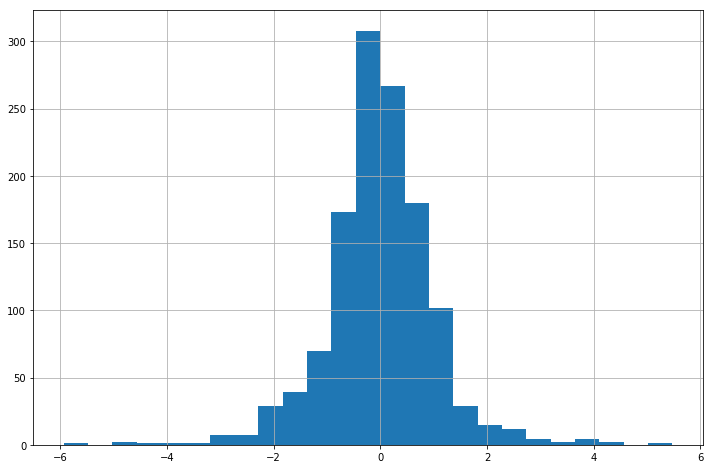

In [58]:
norm.hist(bins= 25 , figsize=(12,8))

In [59]:

df.head(25)


,open,high,low,close,volume,Log_Ret,Crash,Down,Up,Jump
date,,,,,,,,,,
2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248,NaN,0,0,0,0
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,-0.000786,0,1,0,0
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884,0.009724,0,0,0,1
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815,-0.014061,1,0,0,0
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488,0.011676,0,0,0,1
2013-10-10,64.2667,64.4053,63.7068,64.0467,69650490,0.006249,0,0,1,0
2013-10-11,63.7003,64.5963,63.4609,64.4619,66934938,0.006462,0,0,1,0
2013-10-14,64.0718,65.0855,64.0090,64.8841,65474542,0.006528,0,0,1,0
2013-10-15,65.0757,65.6637,64.8161,65.2294,80018603,0.005308,0,0,1,0


In [60]:

# calculating the MA on Close Price MA(3,14,21)
df['MA3'] = df.loc[:,'close'].rolling(3).mean()
df['MA14'] = df.loc[:,'close'].rolling(14).mean()
df['MA21'] = df.loc[:,'close'].rolling(21).mean()
df.head(10)

,open,high,low,close,volume,Log_Ret,Crash,Down,Up,Jump,MA3,MA14,MA21
date,,,,,,,,,,,,,
2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248,NaN,0,0,0,0,NaN,NaN,NaN
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,-0.000786,0,1,0,0,NaN,NaN,NaN
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884,0.009724,0,0,0,1,63.404667,NaN,NaN
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815,-0.014061,1,0,0,0,63.296967,NaN,NaN
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488,0.011676,0,0,0,1,63.452100,NaN,NaN
2013-10-10,64.2667,64.4053,63.7068,64.0467,69650490,0.006249,0,0,1,0,63.534433,NaN,NaN
2013-10-11,63.7003,64.5963,63.4609,64.4619,66934938,0.006462,0,0,1,0,64.052100,NaN,NaN
2013-10-14,64.0718,65.0855,64.0090,64.8841,65474542,0.006528,0,0,1,0,64.464233,NaN,NaN
2013-10-15,65.0757,65.6637,64.8161,65.2294,80018603,0.005308,0,0,1,0,64.858467,NaN,NaN


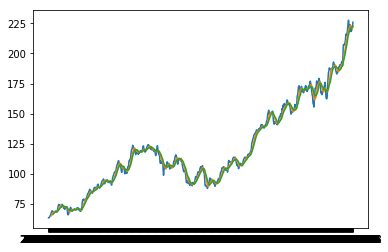

In [61]:
from matplotlib import  pyplot
pyplot.plot(df['MA3'])
pyplot.plot(df['MA14'])
pyplot.plot(df['MA21'])
#pyplot.show()

In [62]:
import plotly
plotly.__version__
import plotly.plotly as py
plotly.tools.set_credentials_file(username='jnandikonda', api_key='LFuC6vc5wjwuPKQNvrXf')
import plotly.graph_objs as go

In [63]:
df.reset_index(inplace=True)

In [64]:
trace=go.Ohlc(x=df.date,
              open=df.open,
              high=df.high,
              low=df.low,
              close=df.close)
py.iplot([trace],filename='simple_ohlc')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jnandikonda/0 or inside your plot.ly account where it is named 'simple_ohlc'


In [103]:
#import plotly.plotly as py
#plotly.tools.set_credentials_file(username='jnandikonda', api_key='8HsRxoog34cCm6o10Yr2')
#import plotly.graph_objs as go
#data = [go.Scatter(x=df.close, y=df.MA3)]
#py.iplot(data)
df.head(10)

,index,date,open,high,low,close,volume,OC,Log_Ret,Crash,Down,Up,Jump,MA3,MA14,MA21
0,0,2013-09-23,64.8919,64.9979,63.1261,64.1777,190021706,129.0696,NaN,0,0,0,0,NaN,NaN,NaN
1,1,2013-09-24,64.7324,64.8095,63.8089,63.9763,90602953,128.7087,-0.003143,0,1,0,0,NaN,NaN,NaN
2,2,2013-09-25,63.9894,64.0469,62.9731,62.9861,79110192,126.9755,-0.015599,1,0,0,0,63.713367,NaN,NaN
3,3,2013-09-26,63.5708,63.9057,63.2961,63.5996,59086559,127.1704,0.009693,0,0,0,1,63.520667,NaN,NaN
4,4,2013-09-27,63.2804,63.3968,62.8802,63.1457,56816676,126.4261,-0.007162,1,0,0,0,63.243800,NaN,NaN
5,5,2013-09-30,62.4263,63.0031,62.0549,62.3609,64852879,124.7872,-0.012506,1,0,0,0,63.035400,NaN,NaN
6,6,2013-10-01,62.5832,63.9815,62.5742,63.8272,88255013,126.4104,0.023241,0,0,0,1,63.111267,NaN,NaN
7,7,2013-10-02,63.5224,64.3295,63.2765,64.0365,71849680,127.5589,0.003274,0,0,1,0,63.408200,NaN,NaN
8,8,2013-10-03,64.1607,64.4014,62.8826,63.2320,80629248,127.3927,-0.012643,1,0,0,0,63.698567,NaN,NaN
9,9,2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,126.4732,-0.000786,0,1,0,0,63.483600,NaN,NaN


In [36]:
trace1 = go.Scatter(x=df.date,y=df.close)
trace2 = go.Scatter(x=df.date,y=df.MA3)
data = [trace1, trace2]
py.iplot(data)

In [100]:
trace3 = go.Scatter(
   x=df.MA3,
   y=df['Log_Ret']
)
trace4 = go.Scatter(
   x=df.MA3,
   y=df['Log_Ret']
)
data = [trace3, trace4]

py.iplot(data)